In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
imagePaths = 'Dataset\\'
label_list = ['Nangka','Pepaya']
data = []
labels = []



In [3]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [4]:
np.array(data).shape

(340, 32, 32, 3)

In [5]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [6]:
print(labels)

['Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nang

In [7]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (272, 32, 32, 3)
Ukuran data test = (68, 32, 32, 3)


In [10]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 50)          0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [12]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [13]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [14]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
9/9 [==============================] - 3s 67ms/step - loss: 0.7344 - accuracy: 0.5846 - val_loss: 0.5269 - val_accuracy: 0.8529
Epoch 2/100
9/9 [==============================] - 0s 36ms/step - loss: 0.4506 - accuracy: 0.8346 - val_loss: 0.3412 - val_accuracy: 0.9265
Epoch 3/100
9/9 [==============================] - 0s 40ms/step - loss: 0.2771 - accuracy: 0.9081 - val_loss: 0.2165 - val_accuracy: 0.9265
Epoch 4/100
9/9 [==============================] - 0s 36ms/step - loss: 0.1782 - accuracy: 0.9412 - val_loss: 0.1719 - val_accuracy: 0.9412
Epoch 5/100
9/9 [==============================] - 0s 35ms/step - loss: 0.1306 - accuracy: 0.9669 - val_loss: 0.0981 - val_accuracy: 0.9706
Epoch 6/100
9/9 [==============================] - 0s 35ms/step - loss: 0.1005 - accuracy: 0.9706 - val_loss: 0.1001 - val_accuracy: 0.9706
Epoch 7/100
9/9 [==============================] - 0s 35ms/step - loss: 0.1196 - accuracy: 0.9559 - val_loss: 0.0611 - val_accuracy: 0.9853
Epoch 8/100
9/9 [===

Epoch 59/100
9/9 [==============================] - 0s 29ms/step - loss: 8.4793e-04 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 0.9853
Epoch 60/100
9/9 [==============================] - 0s 27ms/step - loss: 4.6101e-04 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 61/100
9/9 [==============================] - 0s 31ms/step - loss: 6.7534e-04 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9853
Epoch 62/100
9/9 [==============================] - 0s 34ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 63/100
9/9 [==============================] - 0s 33ms/step - loss: 7.0986e-04 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9706
Epoch 64/100
9/9 [==============================] - 0s 31ms/step - loss: 8.0778e-04 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 0.9853
Epoch 65/100
9/9 [==============================] - 0s 36ms/step - loss: 1.9872e-04 - accuracy: 1.0000 - val_loss: 0.0108 - val_accura

In [15]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
9/9 [==============================] - 0s 37ms/step - loss: 6.1337e-05 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9853
Epoch 2/100
9/9 [==============================] - 0s 34ms/step - loss: 6.7820e-05 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9853
Epoch 3/100
9/9 [==============================] - 0s 31ms/step - loss: 6.4208e-05 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9853
Epoch 4/100
9/9 [==============================] - 0s 28ms/step - loss: 1.2201e-04 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9853
Epoch 5/100
9/9 [==============================] - 0s 29ms/step - loss: 1.0165e-04 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 0.9853
Epoch 6/100
9/9 [==============================] - 0s 29ms/step - loss: 2.1253e-04 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 0.9853
Epoch 7/100
9/9 [==============================] - 0s 34ms/step - loss: 1.4915e-04 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy:

Epoch 58/100
9/9 [==============================] - 0s 32ms/step - loss: 6.1096e-05 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 0.9853
Epoch 59/100
9/9 [==============================] - 0s 28ms/step - loss: 5.5772e-05 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 60/100
9/9 [==============================] - 0s 28ms/step - loss: 1.2624e-04 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 61/100
9/9 [==============================] - 0s 30ms/step - loss: 6.0991e-05 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 62/100
9/9 [==============================] - 0s 28ms/step - loss: 6.2579e-05 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 63/100
9/9 [==============================] - 0s 26ms/step - loss: 1.1900e-04 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 0.9853
Epoch 64/100
9/9 [==============================] - 0s 27ms/step - loss: 1.8986e-04 - accuracy: 1.0000 - val_loss: 0.0228 - val_ac

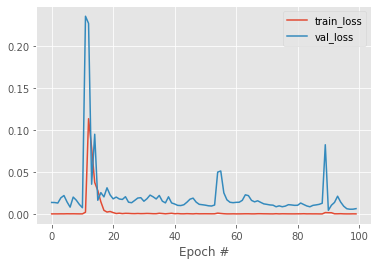

In [16]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [17]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

      Nangka       1.00      1.00      1.00        36
      Pepaya       1.00      1.00      1.00        32

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [18]:
# uji model menggunakan image lain
queryPath = imagePaths+'001.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)
predicted_bit = int(q_pred)
print(predicted_bit)

[[1.]]
1


In [19]:
if q_pred<=0.05 :
    target = "Daun nangka"
else :
    target = "Daun pepaya"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclos

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Output' in function 'cvDestroyWindow'


In [ ]:
#model.save("nangka_pepaya_class_model.h5")